# **1. Introdução**
## 1. Modelagem de sistemas I - Pêndulo simples

O objetivo deste notebook é introduzir o estudante ao estudo de sistemas dinâmicos lineares. Em particular, sistemas dinâmicos lineares invariantes no tempo.

Ao final deste notebook é esperado que o estudante saiba:
- Caracterizar um sistema dinâmico em linear ou não-linear;
- Identificar as vantagens de se linearizar um sistema dinâmico não-linear;



### **Modelo físico**
Para o modelo físico do pêndulo, considere a figura abaixo:

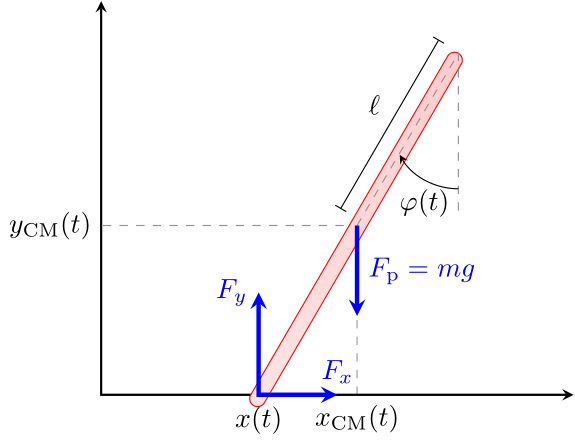






O pêndulo é composto por uma haste (infinitamente) rígida de comprimento $\ell$ e massa $m$. A massa está uniformemente distribuída ao longo de seu comprimento, mas, para efeitos de modelagem, será considerado que a massa está concentrada no centro de massa $(x_{\mathrm{CM}},y_{\mathrm{CM}})$. 

### **Modelo matemático**

É possível demonstrar, a partir da aplicação da lei de Newton para balanço de forças e momentos angulares, que a equação que descreve o movimento do pêndulo é:
$$\begin{split}
mg\ell \sin(\varphi(t)) = &F_x(t)\ell\cos(\varphi(t))- m\ell ^2 [ \ddot{\varphi}(t) \cos(\varphi(t))^2 - \dot{\varphi}(t)^2\sin(\varphi(t))\cos(\varphi(t))].
\end{split}$$

Ao dividir por $m\ell ^2$, obtém-se a equação simplificada:
$$
\ddot{\varphi}(t) \cos(\varphi(t))^2 - \dot{\varphi}(t)^2\sin(\varphi(t))\cos(\varphi(t)) + \frac{g}{\ell} \sin(\varphi(t)) = \frac{F_x(t)}{m\ell}\cos(\varphi(t)).
$$

Se a força horizontal for tal que $F_x(t) = -m\ell \dot{\varphi}(t)^2\sin(\varphi(t))$, a equação que rege o movimento da haste é a mesma equação de um pêndulo simples, como vista em cursos básicos de dinâmica:
$$\ddot{\varphi}(t) +  \frac{g}{\ell} \sin(\varphi(t)) =0. $$

Mesmo esta equação simplificada, que é uma equação diferencial ordinária não-linear de segunda ordem, não pode ser resolvida explicitamente. Sendo assim, um método numérico é a saída mais razoável.

Uma maneira de visualizar resultados oriundos de EDOs não-lineares de segunda ordem se faz a partir do uso de diagramas de fase. Neste diagrama, as posições da massa são plotados no eixo horizontal, e suas velocidade são plotados no eixo vertical. Como a modelagem foi feita a partir do ângulo de inclinação, a posição da massa é dada em radianos.

Serão plotadas, então, trajetórias do tipo $(x(t),y(t))$ com $x(t)\equiv \varphi(t)$ e $y(t)\equiv \dot{\varphi}(t)$, i.e., o sistema a ser resolvido é da forma:
$$ \left\lbrace\begin{array}{l}\dot{x}(t) = y(t); \\ \dot{y}(t) = -\dfrac{g}{\ell}\sin\left(x(t)\right); \end{array}\right.\quad \left.\begin{array}{l}x(0) = x_0; \\ y(0) = y_0. \end{array}\right.$$

Observe que agora tem-se duas equações de primeira ordem. Para resolver este sistema será utilizada a função [`solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) da biblioteca [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html). Para lidar com matrizes, será importada a biblioteca [`numpy`](https://numpy.org/), e a biblioteca [`matplotlib`](https://matplotlib.org/stable/index.html) será usada para plotar os gráficos de interesse.

---

**Obs.:** Também foram importadas as funções [`MultipleLocator`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.MultipleLocator) e [`AutoMinorLocator`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.AutoMinorLocator) do [`matplotlib.ticker`](https://matplotlib.org/stable/api/ticker_api.html) para facilitar a geração de uma malha quadrada como plano de fundo do plot.

In [1]:
# Importação dos pacotes básicos necessários
# Observação: Esses pacotes acompanharão todos os notebooks do curso

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.integrate import solve_ivp

Com as bibliotecas importadas, os parâmetros do problema são definidos.

In [2]:
# Parâmetros do problema
gravidade = 10
comprimento = 4

Neste caso, só dois parâmetros são necessários: a aceleração da gravidade $g$ e meio comprimento da haste $\ell$. Note que, embora o comprimento da haste seja $2\ell$, o centro de massa está localizado no ponto médio, de modo que é utilizado apenas $\ell$ no equacionamento.

Para utilizar a função [`solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), é necessário criar uma função $f$ tal que:
$$f\left(t,\left[\begin{array}{c}x \\y\end{array}\right]\right)= \dfrac{\mathrm{d}}{\mathrm{d}t}\left[\begin{array}{c}x \\y\end{array}\right],$$
ou seja, a função terá como entrada o tempo $t$ e o vetor $\left(x(t),y(t)\right)$, **nesta ordem**, e terá como saída as derivadas da posição e da velocidade.

In [3]:
# Sistema de derivadas a ser resolvido
def sistema_derivadas_pendulo(tempo, vetor_posicao_velocidade):
    return [vetor_posicao_velocidade[1], (-gravidade
                                          *np.sin(vetor_posicao_velocidade[0])
                                          /comprimento)]

# Em Python, a indexação começa no 0 (diferente do MatLab, que começa em 1).
# Note ainda que a derivada da posição é a velocidade, de modo que a primeira
# derivada simplesmente retorna o segundo elemento do vetor de entrada.

Definida a função a ser integrada, são escolhidos os tempos em que o sistema de EDOs será integrado. Além disso, são escolhidas as posições iniciais e as velocidades iniciais para cada trajetória.

Os tempos inicial e final, $t_0$ e $t_\mathrm{f}$, são representados pelas variáveis `tempo_inicial` e `tempo_final`. Uma interpolação linear entre esses dois valores é obtido através do uso da função [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html). As entradas são o tempo inicial, o tempo final e o tamanho do vetor que se deseja obter. A variável de saída é um vetor que será chamado de `tempos`.

Os vetores `posicao_inicial` e `posicao_final` também são definidos a partir da [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html). Porém, a interpretação física é diferente: para cada par de entradas dos vetores `posicao_inicial` e `posicao_final`, é gerado um novo diagrama de fase, que é simulado ao longo de todos os tempos definidos em `tempos`.

Observe ainda que, caso as velocidades ou posições iniciais serjam não físicas, a EDO não será resolvida (ou terá como saída valores não físicos).

**Sugestão:** Teste valores absurdos.

In [4]:
# Trajetórias para diferentes pontos iniciais
tempo_inicial,tempo_final = 0,20
tempos = np.linspace(tempo_inicial, tempo_final, 500)
posicao_inicial = np.linspace(-2.7, 2.1, 25)
velocidade_inicial = np.linspace(-np.pi/comprimento, np.pi/comprimento, 5)

O número total de curvas plotadas é dada pela variável `numero_plots`. Ela multiplica número de entradas no vetor `posicao_inicial` pelo número de entradas no vetor `velocidade_inicial`. Os tamanhos desses vetores podem ser obtidos através da função [`np.size()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html).

In [5]:
numero_plots = np.size(velocidade_inicial)*np.size(posicao_inicial)

Para cada par $(x_0,y_0)$, atribuído à variável `condicao_inicial`, será traçada uma trajetória. Para varrer todas as posições e velocidade são utilizados dois laços `for`.

A solução do sistema é obtido através da função [`solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). Note as entradas:
- `sistema_derivadas_pendulo` é a função que descreve o movimento do sistema, como discutido anteriormente;
- `(tempo_inicial,tempo_final)` são os valores inicial e final (observe que os valores intermediários não são passados aqui);
- `condicao_inicial` é o par $(x_0,y_0)$, aqui ordenado em um array;
- `t_eval=tempos` especifica quais são os tempos de interesse.

O resultado da integração fica armazenado no array `solucao.y`. Este array é constituído de outros dois arrays:
- `solucao.y[0]` são os resultados da integração para a posição; e
- `solucao.y[1]` são os resultados da integração para a velocidade.


---
O ambiente de plot será configurado. Para criar uma imagem, é utilizada a função [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html). Serão atribuídas duas entradas opcionais a esta figura:
- `figsize` é o tamanho do plot em polegadas; e
- `dpi` é a densidade de pixels por polegada quadrada.

Também será definida a paleta de cores do plot, para que cada trajetória tenha uma cor. Isso será feito usando a função [`matplotlib.cm.get_cmap()`](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.get_cmap). A saída de [`matplotlib.cm.get_cmap()`](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.get_cmap) é uma nova função, aqui chamada de `paleta`, que interpola as cores da paleta escolhida entre 0 e 1, i.e. tem como entrada valores entre `0` e `1`, e retorna a cor referente ao valor passado em um [`array`](https://docs.python.org/3/library/array.html) do tipo `[rr, gg, bb, aa]`, onde `rr` é a quantidade de vermelho, `gg` é a quantidade de verde, `bb` é a quantidade de azul e `aa` é a opacidade da cor, todos entre `0` e `1`.


A cor da trajetória é convertida de valores `rrggbbaa` em uma [`string`](https://docs.python.org/3/library/string.html) hexadecimal pela função [`matplotlib.colors.to_hex()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.to_hex.html), e é atribuída à variável `cor`. A variável `indice_cor` servirá como iterador para definir uma cor única a cada nova trajetória.

###### **Obs.:** A etapa acima é puramente estética.
---


Finalmente, o plot é feito através da função [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). Note as entradas:
- `solucao.y[0]` é o array com os valores a serem plotados no eixo horizontal;
- `solucao.y[1]` é o array com os valores a serem plotados no eixo vertical;
- `cor` é a cor da curva, em hexadecimal, formatado em uma [`str`](https://docs.python.org/3/library/stdtypes.html#textseq);
- `lw` é a espessura da curva, aqui definida como `0.5`.

Para tornar o gráfico mais intuitivo, são definidos rótulos para os eixos e um título para o diagrama:
- [`plt.xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) define o rótulo do eixo horizontal;
- [`plt.ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) define o rótulo do eixo vertical;
- [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) define o título do plot.

Além dos plots das trajetórias, seus respectivos gradientes também serão plotados. Para gerar uma malha em cada posição do diagrama de fase é utilizada a função [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html). As posições escolhidas no diagrama são dados por `np.linspace(-4,4,20)` e `np.linspace(-5,5,15)`, ou seja, são `20` posições horizontais linearmente interpoladas entre `-4`e `4`, e analogamente para as posições verticais. As saídas são os arrays `X` e `Y`, cujas entradas são as coordenadas horizontais e verticais da malha, respectivamente. Para definir os valores do gradiente, note que a derivada da posição em cada ponto é simplismente a velocidade, i.e., `derivada_posicao = Y`. Seguindo essa lógica, a derivada da velocidade é calculada por `derivada_velocidade = -(gravidade/comprimento)*np.sin(X)`.

Finalmente, o plot do gradiente é feito através da função [`plt.quiver()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html).

Para ajustar os limites do gráfico, são usadas as funções [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) e [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html). A função [`plt.tight_layout()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html) remove espaços desnecessários e otimiza a área utilizada para o plot dos gráficos na imagem.

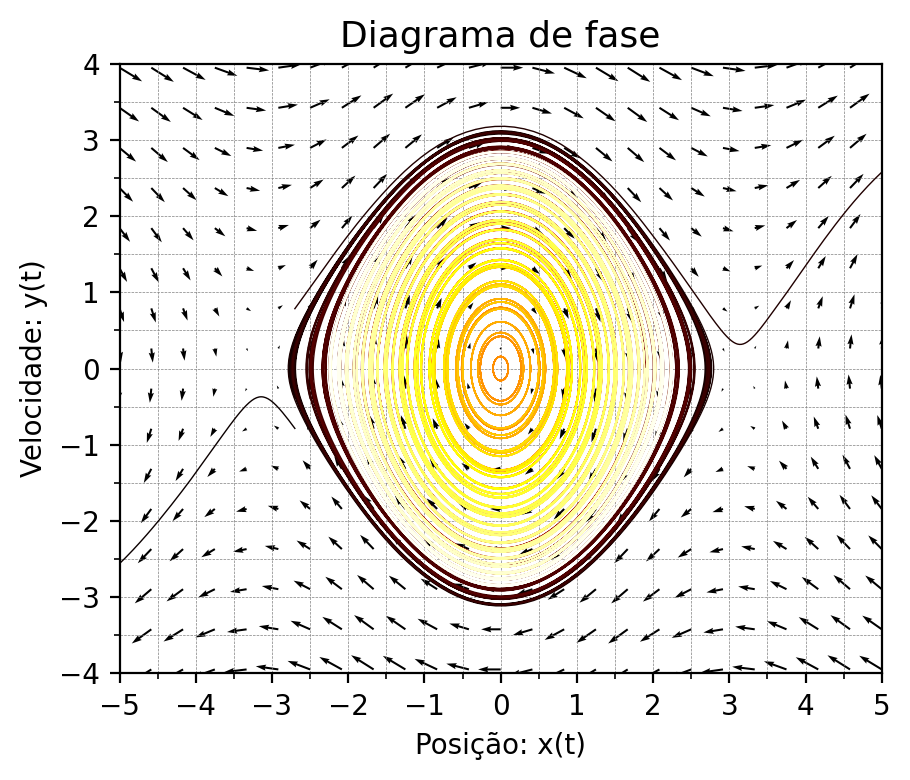

In [6]:
moldura = plt.figure(figsize=(5,4.), dpi=200)
eixo = moldura.add_subplot(111)
paleta = matplotlib.cm.get_cmap('hot')
indice_cor = 0

for x_0 in posicao_inicial:
    for y_0 in velocidade_inicial:
        condicao_inicial = [x_0, y_0]
        solucao = solve_ivp(sistema_derivadas_pendulo,(tempo_inicial,tempo_final),
                            condicao_inicial,t_eval=tempos)
        cor = matplotlib.colors.to_hex(paleta(indice_cor/numero_plots))
        indice_cor += 1
        plt.plot(solucao.y[0], solucao.y[1], cor, lw=0.5)

plt.xlabel("Posição: x(t)")
plt.ylabel("Velocidade: y(t)")
plt.title("Diagrama de fase", fontsize=13)
plt.grid(which="major")
X,Y = np.meshgrid(np.linspace(-5,5,25),
                  np.linspace(-5,5,20))
derivada_posicao = sistema_derivadas_pendulo(0,(X,Y))[0]
derivada_velocidade = sistema_derivadas_pendulo(0,(X,Y))[1]

plt.quiver(X,Y,derivada_posicao,derivada_velocidade)

eixo.xaxis.set_major_locator(MultipleLocator(1))
eixo.yaxis.set_major_locator(MultipleLocator(1))

eixo.xaxis.set_minor_locator(AutoMinorLocator(2))
eixo.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.grid(which='both',color='gray', linestyle='--', linewidth=0.25)
plt.axes(eixo).set_aspect('equal')
plt.xlim(-5,5)
plt.ylim(-4,4)
plt.tight_layout()